## **Program 6**

## Linear functions and the Bernstein-Vazirani Algorithm
The Deutch-Jozsa algorithm allows us to distinguish between constant and balanced Boolean functions. There is an extension to the Deutsch-Jozsa algorithm that allows us to extract some information about a certain other class of functions. This is what we will be exploring now. 

An $n$-bit Boolean function $f(x)$ is called linear if it can be written as the bitwise product of a particular $n$-bit binary string $a$ and the function variable $x$ (which is  also a binary string of length $n$), i.e., linear functions can be written as 
$$f(x) = a\cdot x \;(\text{ mod } 2)$$

You might recall from the discussion on the Hadamard transform, that for any general $n$-qubit computational basis state, the Hadamard transform has the following effect
$$H^{\otimes n}|a\rangle = \frac{1}{2^{n/2}}\sum\limits_{x=0}^{n-1}(-1)^{a\cdot x}|x\rangle$$
Due to the self-inverting nature of the Hadamard transformation, we can apply $H^{\otimes n}$ to both sides of the above equation and get (after flipping sides)
$$H^{\otimes n} \left( \frac{1}{2^{n/2}}\sum\limits_{x=0}^{n-1}(-1)^{a\cdot x}|x\rangle \right) = |a\rangle$$
The term inside the brackets on the left hand side of the equation looks like what we would get if we passed an equal superposition state through a phase oracle for the Boolean function $f(x) = a\cdot x \;(\text{ mod } 2)$. This is depicted in the equation below:
$$\frac{1}{2^{n/2}}\sum\limits_{x=0}^{n-1}|x\rangle \xrightarrow{U_f} \frac{1}{2^{n/2}}\sum\limits_{x=0}^{n-1}(-1)^{a\cdot x}|x\rangle$$

The Bernstein-Vazirani algorithm uses all the things discussed above. Given an oracle for a function that we know is linear, we can find the binary string $a$ corresponding to the linear function. The steps of the algorithm are shown in the equation below and then described in words.
$$|0^{\otimes n}\rangle \xrightarrow{H^{\otimes n}} \frac{1}{2^{n/2}}\sum\limits_{x=0}^{n-1}|x\rangle \xrightarrow{U_f} \frac{1}{2^{n/2}}\sum\limits_{x=0}^{n-1}(-1)^{a\cdot x}|x\rangle \xrightarrow{H^{\otimes n}} |a\rangle$$
In the expression above, we've omitted (for readability) the mention of the extra qubit in the $|-\rangle$ state that is required for the oracle output, but it is necessary. 

## **Problem 2**
Consider the Boolean function $f(x) = (\overline{x_1} \wedge x_0) \vee (x_1 \wedge \overline{x_0})$. Take it as given that this function is a linear function. We want to find the 2-bit binary string $a$ such that the function. Your objective is to use this expression above to implement the quantum bit oracle for this Boolean function. 
This is more complex than any expression we have seen so far, so the implementation will be carried out in a few steps. 

A `QuantumCircuit()` with 3 qubits is provided below.
- $q_0$ and $q_1$ are the input qubits for the variables $x_0$ and $x_1$ respectively.
- $q_4$ is the output qubit and stores the value of the final Boolean function expression

In [3]:
# Importing standard python and Qiskit libraries

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import *
from qiskit.quantum_info import *
basis_gates = ['id', 'x', 'y', 'z', 's', 't', 'sdg', 'tdg', 'h', 'p', 'sx' ,'r', 'rx', 'ry', 'rz', 'u', 'u1', 'u2', 'u3', 'cx', 'ccx', 'barrier', 'measure', 'snapshot']

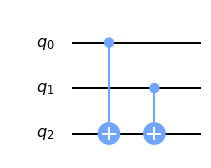

In [4]:
bv_oracle = QuantumCircuit(3)
bv_oracle.cx(0,2)
bv_oracle.cx(1,2)
bv_oracle.draw('mpl')

Using the bit oracle provided above, construct a circuit for the Bernstein-Vazirani algorithm.The  steps for the algorithm are as follows:
1. Start will $(n+1)$ qubits in the $|0\rangle$ state. Here $n=2$. The first two qubits $q_0$ and $q_1$ will serve as input to the oracle. The extra qubit is used for the oracle output. Since we need a phase oracle, add gates to prepare the state $|-\rangle$ in this qubit ($q_2$). 
2. Apply an $H$ gate to all the input qubits. 
3. Apply the oracle $U_f$ 
4. Apply an $H$ gate to all the input qubits. 
5. Measure the $n$ input qubits. 
If the function corresponding to  $U_f$ is linear, the final state measured will be the binary string $a$.

Astute readers will notice that the steps followed in the Bernstein-Vazirani and the Deutsch-jozsa algorithms are the same. `bv_circ` is a `QuantumCircuit(3,2)` given below. Add necessary operations to the circuit below to realise the steps for the Bernstein-Vazirani algorithm.

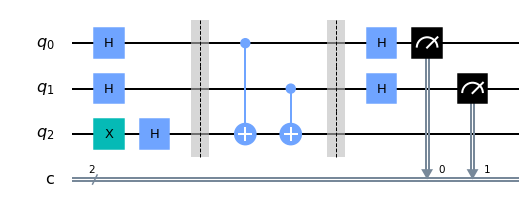

In [5]:
bv_circ = QuantumCircuit(3,2)

bv_circ.h(range(2))
bv_circ.x(2)
bv_circ.h(2)
bv_circ.barrier()
bv_circ=bv_circ+bv_oracle
bv_circ.barrier()
bv_circ.h(range(2))
bv_circ.measure(range(2),range(2))

# Do not remove this line
bv_circ.draw(output='mpl')

 Your circuit produced the correct output.


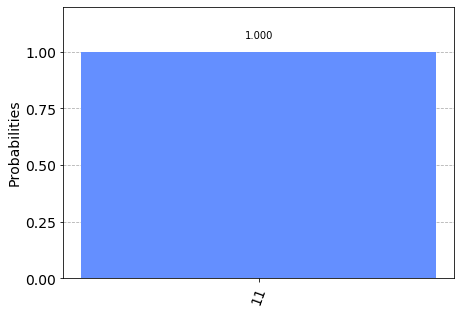

In [7]:
try:
    assert list(bv_circ.count_ops()) != [], f"Circuit cannot be empty"
    assert set(bv_circ.count_ops().keys()).difference(basis_gates) == set(), f"Only the following basic gates are allowed: {basis_gates}"
    counts = execute(bv_circ.reverse_bits(), backend=QasmSimulator(), shots=8192).result().get_counts()
    assert list(counts.keys()) == ['11'], "Your circuit did not produce the right answer"
    print(" Your circuit produced the correct output.")
except AssertionError as e:
    print(f'Your code has an error:  {e.args[0]}')
    
except Exception as e:
    print(f'This error occured: {e.args[0]}')
plot_histogram(counts)